In [159]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy.stats import chi2_contingency
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\GamePlayData\GamePlay_230103_093606.csv')

In [160]:
df.head()

,ID,PatientID,GameID,SessionID,StartTimeStampDate,EndTimeStampDate,StartTimeStampMS,EndTimeStampMS,MainMode,HapticsActivation,HapticsMode,ForceLevel,GameLevelA,GameLevelB,GameLevelC
0,2614,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,4,dec_9_malaikaTybvnMtqEku+DhnWRd7xrQ==,12/9/2022 3:52:05 PM,12/9/2022 3:52:58 PM,842823,897103,Auto,ON,Resistance,Low,Auto,NaN,NaN
1,2615,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,6,dec_9_malaikaTybvnMtqEku+DhnWRd7xrQ==,12/9/2022 3:53:26 PM,12/9/2022 3:54:33 PM,925847,993791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2616,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,9,dec_9_malaikaTybvnMtqEku+DhnWRd7xrQ==,12/9/2022 3:54:54 PM,12/9/2022 3:55:45 PM,1014522,1067112,Auto,ON,Perturbation,Low,Auto,NaN,NaN
3,2617,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,10,dec_9_malaikaTybvnMtqEku+DhnWRd7xrQ==,12/9/2022 3:56:19 PM,12/9/2022 3:56:59 PM,1100927,1142147,Auto,ON,Perturbation,Low,Auto,NaN,NaN
4,2875,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,10,dec_9_malaikalvO23Jnge02XqbjOoij/9A==,12/23/2022 4:38:48 PM,12/23/2022 4:40:00 PM,1387345,1460895,Auto,ON,Perturbation,Low,Auto,NaN,NaN


In [161]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ID - 0%
PatientID - 0%
GameID - 0%
SessionID - 0%
StartTimeStampDate - 0%
EndTimeStampDate - 0%
StartTimeStampMS - 0%
EndTimeStampMS - 0%
MainMode - 37%
HapticsActivation - 40%
HapticsMode - 13%
ForceLevel - 40%
GameLevelA - 63%
GameLevelB - 100%
GameLevelC - 73%


In [162]:
#Checking Session Names
#for index, row in df.iterrows():
#    print(row['SessionID'])


In [163]:
#Lets change the sessions name for our understanding
df['SessionID'] = (pd.Series(df['SessionID'].factorize()[0])
                 .add(1).astype(str).radd('Session'))

In [164]:
df.head()

,ID,PatientID,GameID,SessionID,StartTimeStampDate,EndTimeStampDate,StartTimeStampMS,EndTimeStampMS,MainMode,HapticsActivation,HapticsMode,ForceLevel,GameLevelA,GameLevelB,GameLevelC
0,2614,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,4,Session1,12/9/2022 3:52:05 PM,12/9/2022 3:52:58 PM,842823,897103,Auto,ON,Resistance,Low,Auto,NaN,NaN
1,2615,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,6,Session1,12/9/2022 3:53:26 PM,12/9/2022 3:54:33 PM,925847,993791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2616,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,9,Session1,12/9/2022 3:54:54 PM,12/9/2022 3:55:45 PM,1014522,1067112,Auto,ON,Perturbation,Low,Auto,NaN,NaN
3,2617,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,10,Session1,12/9/2022 3:56:19 PM,12/9/2022 3:56:59 PM,1100927,1142147,Auto,ON,Perturbation,Low,Auto,NaN,NaN
4,2875,dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==,10,Session2,12/23/2022 4:38:48 PM,12/23/2022 4:40:00 PM,1387345,1460895,Auto,ON,Perturbation,Low,Auto,NaN,NaN


In [165]:
#Hard-coding the patients name, as in the next version the csv file will have encrypted usernames
user_id_dict = {
    'dec_9_malaikaV3+4WDsIHUeDks9bDrHhHw==':'Patient_1',
    'dec_9_malaikaMeYqsw7/pkWtd3fIpb8PnQ==':'Patient_2', 
    'dec_9_malaikaAhE50ZShskiymuSGML3vww==':'Patient_3', 
}; 

In [166]:
# replace PatientID with username
df.replace({'PatientID':user_id_dict},inplace=True)

In [167]:
df.head()

,ID,PatientID,GameID,SessionID,StartTimeStampDate,EndTimeStampDate,StartTimeStampMS,EndTimeStampMS,MainMode,HapticsActivation,HapticsMode,ForceLevel,GameLevelA,GameLevelB,GameLevelC
0,2614,Patient_1,4,Session1,12/9/2022 3:52:05 PM,12/9/2022 3:52:58 PM,842823,897103,Auto,ON,Resistance,Low,Auto,NaN,NaN
1,2615,Patient_1,6,Session1,12/9/2022 3:53:26 PM,12/9/2022 3:54:33 PM,925847,993791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2616,Patient_1,9,Session1,12/9/2022 3:54:54 PM,12/9/2022 3:55:45 PM,1014522,1067112,Auto,ON,Perturbation,Low,Auto,NaN,NaN
3,2617,Patient_1,10,Session1,12/9/2022 3:56:19 PM,12/9/2022 3:56:59 PM,1100927,1142147,Auto,ON,Perturbation,Low,Auto,NaN,NaN
4,2875,Patient_1,10,Session2,12/23/2022 4:38:48 PM,12/23/2022 4:40:00 PM,1387345,1460895,Auto,ON,Perturbation,Low,Auto,NaN,NaN


In [168]:
game_id_dict = {
     0 : 'Explore the World', 
     1 : 'Catch the Fish',
     2 : 'Flying Drone', 
     3 : 'Matching Pair', 
     4 : 'Fast Lane', 
     5 : 'Cooking Master',
     6 : 'Flower Shop',   
     7 : 'Isokinetic/Trajectory module/passive',  
     8 : 'Haptic Force Module',
     9 : 'Music Maestro',
     10 : 'Speed Challenge'
}

In [169]:
#Adding another row with the game name
gameid = []
for row in df['GameID']:
    if row == 0 :    gameid.append('Explore the World')
    elif row == 1:   gameid.append('Catch the Fish')
    elif row == 2:  gameid.append('Flying Drone')
    elif row == 3:  gameid.append('Matching Pair')
    elif row == 4:  gameid.append('Fast Lane')
    elif row == 5:  gameid.append('Cooking Master')
    elif row == 6:  gameid.append('Flower Shop')
    elif row == 7:  gameid.append('Isokinetic/Trajectory module/passive')
    elif row == 8:  gameid.append('Haptic Force Module')
    elif row == 9:  gameid.append('Music Maestro')
    elif row == 10:  gameid.append('Speed Challenge')


    else:           gameid.append('Not_Present')

In [170]:
df['GameID'].unique()

array([ 4,  6,  9, 10,  3,  2,  0,  1], dtype=int64)

In [278]:
df['GameID_names']= gameid

In [279]:
df.head()

,ID,PatientID,GameID,SessionID,StartTimeStampDate,EndTimeStampDate,StartTimeStampMS,EndTimeStampMS,MainMode,HapticsActivation,HapticsMode,ForceLevel,GameLevelA,GameLevelB,GameLevelC,GameID_names,Total_time_minutes
0,2614,Patient_1,4,Session1,2022-12-09 15:52:05,2022-12-09 15:52:58,842823,897103,Auto,ON,Resistance,Low,Auto,NaN,NaN,Fast Lane,0.883333
1,2615,Patient_1,6,Session1,2022-12-09 15:53:26,2022-12-09 15:54:33,925847,993791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flower Shop,1.116667
2,2616,Patient_1,9,Session1,2022-12-09 15:54:54,2022-12-09 15:55:45,1014522,1067112,Auto,ON,Perturbation,Low,Auto,NaN,NaN,Music Maestro,0.850000
3,2617,Patient_1,10,Session1,2022-12-09 15:56:19,2022-12-09 15:56:59,1100927,1142147,Auto,ON,Perturbation,Low,Auto,NaN,NaN,Speed Challenge,0.666667
4,2875,Patient_1,10,Session2,2022-12-23 16:38:48,2022-12-23 16:40:00,1387345,1460895,Auto,ON,Perturbation,Low,Auto,NaN,NaN,Speed Challenge,1.200000


In [280]:
#convert columns to datetime format
df[['StartTimeStampDate', 'EndTimeStampDate']] = df[['StartTimeStampDate', 'EndTimeStampDate']].apply(pd.to_datetime)

In [281]:
df['Total_time_minutes'] = (df['EndTimeStampDate'] - df['StartTimeStampDate']).dt.total_seconds() / 60

In [282]:
df.head()

,ID,PatientID,GameID,SessionID,StartTimeStampDate,EndTimeStampDate,StartTimeStampMS,EndTimeStampMS,MainMode,HapticsActivation,HapticsMode,ForceLevel,GameLevelA,GameLevelB,GameLevelC,GameID_names,Total_time_minutes
0,2614,Patient_1,4,Session1,2022-12-09 15:52:05,2022-12-09 15:52:58,842823,897103,Auto,ON,Resistance,Low,Auto,NaN,NaN,Fast Lane,0.883333
1,2615,Patient_1,6,Session1,2022-12-09 15:53:26,2022-12-09 15:54:33,925847,993791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flower Shop,1.116667
2,2616,Patient_1,9,Session1,2022-12-09 15:54:54,2022-12-09 15:55:45,1014522,1067112,Auto,ON,Perturbation,Low,Auto,NaN,NaN,Music Maestro,0.850000
3,2617,Patient_1,10,Session1,2022-12-09 15:56:19,2022-12-09 15:56:59,1100927,1142147,Auto,ON,Perturbation,Low,Auto,NaN,NaN,Speed Challenge,0.666667
4,2875,Patient_1,10,Session2,2022-12-23 16:38:48,2022-12-23 16:40:00,1387345,1460895,Auto,ON,Perturbation,Low,Auto,NaN,NaN,Speed Challenge,1.200000


## Input the Username of the patient

In [283]:
#For the time being, user can select only one patient at a time, in the next version user can select as many patient as he/she wants
print(df['PatientID'].unique())
# Taking patient input from the user
string = input('Enter the patient username ')
 
# Output
print(string)

['Patient_1' 'Patient_3' 'Patient_2']
Enter the patient username Patient_3
Patient_3


In [284]:
# Split Dataframe using groupby() &
# grouping by particular dataframe column
grouped = df.groupby(df.PatientID)
df1 = grouped.get_group(string)
df1.reset_index().head()

,index,ID,PatientID,GameID,SessionID,StartTimeStampDate,EndTimeStampDate,StartTimeStampMS,EndTimeStampMS,MainMode,HapticsActivation,HapticsMode,ForceLevel,GameLevelA,GameLevelB,GameLevelC,GameID_names,Total_time_minutes
0,8,2610,Patient_3,0,Session4,2022-12-09 15:45:29,2022-12-09 15:46:19,440277,491452,Auto,NaN,Auto,NaN,NaN,NaN,2.0,Explore the World,0.833333
1,9,2611,Patient_3,1,Session4,2022-12-09 15:46:36,2022-12-09 15:47:49,507887,583012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catch the Fish,1.216667
2,10,2612,Patient_3,2,Session4,2022-12-09 15:48:01,2022-12-09 15:49:15,595257,669642,NaN,ON,Perturbation,Medium,NaN,NaN,NaN,Flying Drone,1.233333
3,11,2613,Patient_3,3,Session4,2022-12-09 15:49:34,2022-12-09 15:50:50,688892,766897,Auto,ON,Resistance,Low,Auto,NaN,NaN,Matching Pair,1.266667
4,12,2618,Patient_3,0,Session5,2022-12-09 16:01:27,2022-12-09 16:02:17,1414434,1465974,Auto,NaN,Auto,NaN,NaN,NaN,2.0,Explore the World,0.833333


In [285]:
session=df1['SessionID'].unique()
session

array(['Session4', 'Session5', 'Session6', 'Session7'], dtype=object)

In [286]:
df2=df1 #Making a copy

In [287]:
#Computing each session time
session_time=[]
date=[]
for x in session:
    check_index=df2.ID[df2['SessionID'] == x].tolist()
    start_date = df2[df2.ID == check_index[0]]['StartTimeStampDate'].iloc[0]
    end_date = df2[df2.ID == check_index[-1]]['EndTimeStampDate'].iloc[0]
    date.append(str(end_date)[:10])
    session_time.append((end_date - start_date).total_seconds() / 60.0)

# Plotting Sessions

In [288]:
data = {'Session Names': session,
        'Session Time': session_time,
        'Session Date': date}
df_session = pd.DataFrame(data)

In [289]:
df_session

,Session Names,Session Time,Session Date
0,Session4,5.35,2022-12-09
1,Session5,3.45,2022-12-09
2,Session6,2.70,2022-12-09
3,Session7,3.70,2022-12-23


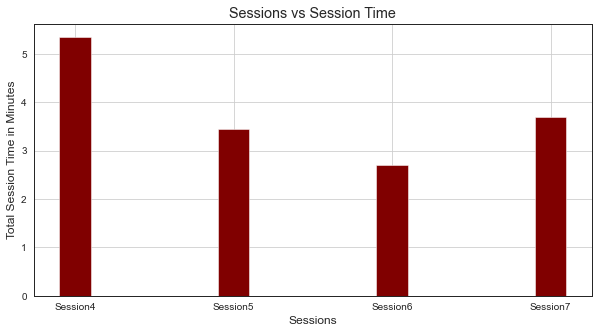

In [290]:
#Session Vs Session Time
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_session['Session Names'], df_session['Session Time'], color ='maroon',
        width = 0.2)
plt.xlabel("Sessions")
plt.ylabel("Total Session Time in Minutes")
plt.title("Sessions vs Session Time")
plt.grid(b=None)
plt.show()

In [291]:
df_tot=df_session.groupby(['Session Date']).sum()
df_tot=df_tot.reset_index()
df_tot

,Session Date,Session Time
0,2022-12-09,11.5
1,2022-12-23,3.7


In [292]:
active_days = df_tot['Session Date'].count()
print(f'total number of days played = {active_days} days')

total number of days played = 2 days


In [293]:
df_total=df_tot['Session Time'].sum()
df_total
print(f'Average mins per day = {df_total/active_days}')

Average mins per day = 7.6


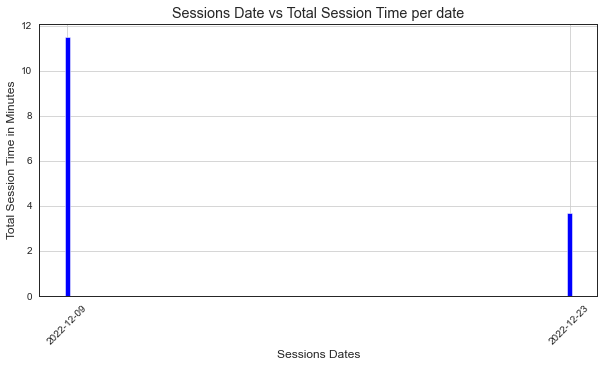

In [318]:
#Session Date Vs Session Time
fig = plt.figure(figsize = (10, 5))
plt.xticks(rotation=45)
# creating the bar plot
plt.bar(df_tot['Session Date'], df_tot['Session Time'], color ='blue',
        width = 0.01)
plt.xlabel("Sessions Dates")
plt.ylabel("Total Session Time in Minutes")
plt.title("Sessions Date vs Total Session Time per date")


plt.grid(b=None)
plt.show()

# Gameplays Time Computation

Plotting the sessions and gameplay by user input

In [295]:
# Split Dataframe using groupby() &
# grouping by particular dataframe column
grouped = df.groupby(df.PatientID)
df1 = grouped.get_group(string)
df1

,ID,PatientID,GameID,SessionID,StartTimeStampDate,EndTimeStampDate,StartTimeStampMS,EndTimeStampMS,MainMode,HapticsActivation,HapticsMode,ForceLevel,GameLevelA,GameLevelB,GameLevelC,GameID_names,Total_time_minutes
8,2610,Patient_3,0,Session4,2022-12-09 15:45:29,2022-12-09 15:46:19,440277,491452,Auto,NaN,Auto,NaN,NaN,NaN,2.0,Explore the World,0.833333
9,2611,Patient_3,1,Session4,2022-12-09 15:46:36,2022-12-09 15:47:49,507887,583012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catch the Fish,1.216667
10,2612,Patient_3,2,Session4,2022-12-09 15:48:01,2022-12-09 15:49:15,595257,669642,NaN,ON,Perturbation,Medium,NaN,NaN,NaN,Flying Drone,1.233333
11,2613,Patient_3,3,Session4,2022-12-09 15:49:34,2022-12-09 15:50:50,688892,766897,Auto,ON,Resistance,Low,Auto,NaN,NaN,Matching Pair,1.266667
12,2618,Patient_3,0,Session5,2022-12-09 16:01:27,2022-12-09 16:02:17,1414434,1465974,Auto,NaN,Auto,NaN,NaN,NaN,2.0,Explore the World,0.833333
13,2619,Patient_3,0,Session5,2022-12-09 16:02:48,2022-12-09 16:03:15,1497502,1524682,Auto,NaN,Auto,NaN,NaN,NaN,2.0,Explore the World,0.450000
14,2620,Patient_3,2,Session5,2022-12-09 16:03:33,2022-12-09 16:04:10,1543142,1580652,NaN,ON,Perturbation,Medium,NaN,NaN,NaN,Flying Drone,0.616667
15,2621,Patient_3,2,Session5,2022-12-09 16:04:21,2022-12-09 16:04:54,1592117,1625527,NaN,ON,Perturbation,Medium,NaN,NaN,NaN,Flying Drone,0.550000
16,2622,Patient_3,0,Session6,2022-12-09 16:28:01,2022-12-09 16:28:26,3036610,3061590,Auto,NaN,Auto,NaN,NaN,NaN,0.0,Explore the World,0.416667
17,2623,Patient_3,0,Session6,2022-12-09 16:28:39,2022-12-09 16:29:06,3075075,3102445,Auto,NaN,Auto,NaN,NaN,NaN,0.0,Explore the World,0.450000


In [296]:
print(df1['GameID_names'].unique())

['Explore the World' 'Catch the Fish' 'Flying Drone' 'Matching Pair'
 'Fast Lane' 'Flower Shop' 'Music Maestro']


In [297]:
#User to select the session
sess=len(df1['SessionID'].unique())

In [298]:
def input_w_def(query_str, sessions):
    DISPLAY_ON = False
    query_str = query_str + " (Enter the IDs of the sessions as a comma-separated list): "

    session_ids = input(query_str)

    if not session_ids:
        session_ids = [0]
    else:
        session_ids = list(map(int, session_ids.split(',')))

    session_names = [sessions[session_id] for session_id in session_ids]

    if DISPLAY_ON:
        print("Session IDs: " + str(session_ids))
        print("Session Names: " + str(session_names))

    return session_ids, session_names


In [299]:
df1['Session ID'] = pd.factorize(df1['SessionID'])[0]
df1.head()

,ID,PatientID,GameID,SessionID,StartTimeStampDate,EndTimeStampDate,StartTimeStampMS,EndTimeStampMS,MainMode,HapticsActivation,HapticsMode,ForceLevel,GameLevelA,GameLevelB,GameLevelC,GameID_names,Total_time_minutes,Session ID
8,2610,Patient_3,0,Session4,2022-12-09 15:45:29,2022-12-09 15:46:19,440277,491452,Auto,NaN,Auto,NaN,NaN,NaN,2.0,Explore the World,0.833333,0
9,2611,Patient_3,1,Session4,2022-12-09 15:46:36,2022-12-09 15:47:49,507887,583012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catch the Fish,1.216667,0
10,2612,Patient_3,2,Session4,2022-12-09 15:48:01,2022-12-09 15:49:15,595257,669642,NaN,ON,Perturbation,Medium,NaN,NaN,NaN,Flying Drone,1.233333,0
11,2613,Patient_3,3,Session4,2022-12-09 15:49:34,2022-12-09 15:50:50,688892,766897,Auto,ON,Resistance,Low,Auto,NaN,NaN,Matching Pair,1.266667,0
12,2618,Patient_3,0,Session5,2022-12-09 16:01:27,2022-12-09 16:02:17,1414434,1465974,Auto,NaN,Auto,NaN,NaN,NaN,2.0,Explore the World,0.833333,1


In [300]:
session_ids = df1['Session ID'].unique()
session_names = df1['SessionID'].unique()

for session_id, session_name in zip(session_ids, session_names):
    print(f"{session_id} {session_name}")
selected_session_ids, selected_session_names = input_w_def("Enter the IDs of the sessions", session_names)
print("Selected session IDs:", selected_session_ids)
print("Selected session names:", selected_session_names)


0 Session4
1 Session5
2 Session6
3 Session7
Enter the IDs of the sessions (Enter the IDs of the sessions as a comma-separated list): 0,1,2,3
Selected session IDs: [0, 1, 2, 3]
Selected session names: ['Session4', 'Session5', 'Session6', 'Session7']


In [301]:
selected_rows = df1[df1['SessionID'].isin(selected_session_names)].index
selected_data = df1.loc[selected_rows]
selected_columns = ['GameID','GameID_names','SessionID'] # List of column names to extract
selected_data = selected_data[selected_columns]

In [302]:
selected_data

,GameID,GameID_names,SessionID
8,0,Explore the World,Session4
9,1,Catch the Fish,Session4
10,2,Flying Drone,Session4
11,3,Matching Pair,Session4
12,0,Explore the World,Session5
13,0,Explore the World,Session5
14,2,Flying Drone,Session5
15,2,Flying Drone,Session5
16,0,Explore the World,Session6
17,0,Explore the World,Session6


In [303]:
game_ids = selected_data['GameID'].unique()
game_names = selected_data['GameID_names'].unique()
for game_id, game_name in zip(game_ids, game_names):
    print(f"{game_id} {game_name}")
def input_games(games,games_id):
    game_dict = dict(zip(games_id, games))
    entered_ids = input("Enter the games IDs separated by commas: ")
    entered_ids = [int(x) for x in entered_ids.split(',')]
    selected_games = [game_dict[x] for x in entered_ids if x in game_dict]
    return selected_games

selected_games = input_games(game_names,game_ids)
print(selected_games)

0 Explore the World
1 Catch the Fish
2 Flying Drone
3 Matching Pair
4 Fast Lane
6 Flower Shop
9 Music Maestro
Enter the games IDs separated by commas: 0,1,2,3,4,6,9
['Explore the World', 'Catch the Fish', 'Flying Drone', 'Matching Pair', 'Fast Lane', 'Flower Shop', 'Music Maestro']


In [304]:
selected_games = df1[df1['GameID_names'].isin(selected_games)].index
selected_data_games = df1.loc[selected_games]

In [305]:
selected_columns_games = ['GameID','GameID_names','StartTimeStampDate','EndTimeStampDate','Total_time_minutes'] # List of column names to extract
selected_data_games = selected_data_games[selected_columns_games]
selected_data_games=selected_data_games.reset_index(drop=True)
selected_data_games

,GameID,GameID_names,StartTimeStampDate,EndTimeStampDate,Total_time_minutes
0,0,Explore the World,2022-12-09 15:45:29,2022-12-09 15:46:19,0.833333
1,1,Catch the Fish,2022-12-09 15:46:36,2022-12-09 15:47:49,1.216667
2,2,Flying Drone,2022-12-09 15:48:01,2022-12-09 15:49:15,1.233333
3,3,Matching Pair,2022-12-09 15:49:34,2022-12-09 15:50:50,1.266667
4,0,Explore the World,2022-12-09 16:01:27,2022-12-09 16:02:17,0.833333
5,0,Explore the World,2022-12-09 16:02:48,2022-12-09 16:03:15,0.450000
6,2,Flying Drone,2022-12-09 16:03:33,2022-12-09 16:04:10,0.616667
7,2,Flying Drone,2022-12-09 16:04:21,2022-12-09 16:04:54,0.550000
8,0,Explore the World,2022-12-09 16:28:01,2022-12-09 16:28:26,0.416667
9,0,Explore the World,2022-12-09 16:28:39,2022-12-09 16:29:06,0.450000


In [306]:
selected_rows = input("Enter the rows you want to select (comma separated): ")
selected_rows = selected_rows.split(',')

# Create a list to store the selected rows
final_selected_rows = []

# Loop through each row in `selected_rows`
for row in selected_rows:
    try:
        # If the row is an integer, add it to the list of selected rows
        final_selected_rows.append(int(row))
    except ValueError:
        # If the row is not an integer, check if it's a range
        range_indices = row.split(':')
        try:
            # If the row is a range, add all integers within the range to the list of selected rows
            start_index = int(range_indices[0])
            end_index = int(range_indices[1])
            final_selected_rows += list(range(start_index, end_index+1))
        except (ValueError, IndexError):
            # If the row is neither an integer nor a range, print an error message and exit the program
            print("Invalid input. Only integers and ranges allowed.")
            exit()



Enter the rows you want to select (comma separated): 0:14


In [307]:
# Select the rows from the DataFrame
selected_games=selected_data_games.loc[final_selected_rows]
selected_games

,GameID,GameID_names,StartTimeStampDate,EndTimeStampDate,Total_time_minutes
0,0,Explore the World,2022-12-09 15:45:29,2022-12-09 15:46:19,0.833333
1,1,Catch the Fish,2022-12-09 15:46:36,2022-12-09 15:47:49,1.216667
2,2,Flying Drone,2022-12-09 15:48:01,2022-12-09 15:49:15,1.233333
3,3,Matching Pair,2022-12-09 15:49:34,2022-12-09 15:50:50,1.266667
4,0,Explore the World,2022-12-09 16:01:27,2022-12-09 16:02:17,0.833333
5,0,Explore the World,2022-12-09 16:02:48,2022-12-09 16:03:15,0.450000
6,2,Flying Drone,2022-12-09 16:03:33,2022-12-09 16:04:10,0.616667
7,2,Flying Drone,2022-12-09 16:04:21,2022-12-09 16:04:54,0.550000
8,0,Explore the World,2022-12-09 16:28:01,2022-12-09 16:28:26,0.416667
9,0,Explore the World,2022-12-09 16:28:39,2022-12-09 16:29:06,0.450000


In [308]:
grouped_games = selected_games.groupby('GameID').agg({'Total_time_minutes': 'sum', 'GameID': 'size'})
grouped_games = grouped_games.rename(columns={'GameID': 'count'})
#print(grouped_games)
grouped_games = grouped_games.reset_index()
merged = pd.merge(grouped_games, selected_games[['GameID', 'GameID_names']].drop_duplicates(), on='GameID', how='left')
merged['Avg_time_per_game'] = merged['Total_time_minutes'] / merged['count']
print(merged)


   GameID  Total_time_minutes  count       GameID_names  Avg_time_per_game
0       0            3.400000      6  Explore the World           0.566667
1       1            1.216667      1     Catch the Fish           1.216667
2       2            2.400000      3       Flying Drone           0.800000
3       3            1.833333      2      Matching Pair           0.916667
4       4            1.533333      1          Fast Lane           1.533333
5       6            0.783333      1        Flower Shop           0.783333
6       9            0.466667      1      Music Maestro           0.466667


In [309]:
Total_time=((merged['Total_time_minutes'].sum())/60)
print('Patient Played for %.2f'% Total_time,'hrs')

Patient Played for 0.19 hrs


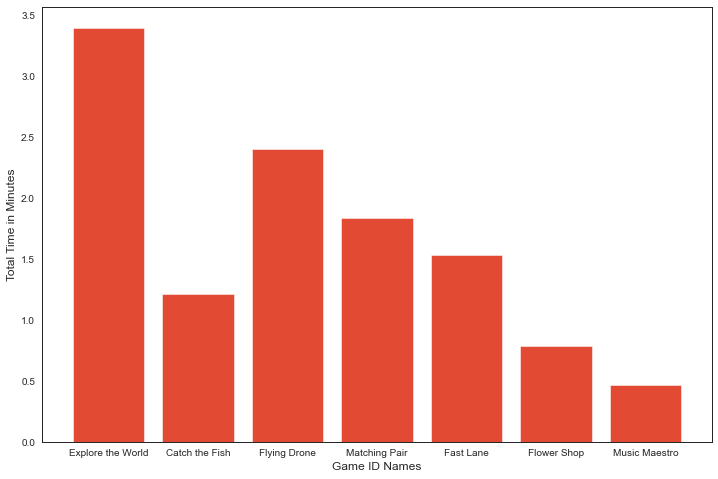

In [310]:
plt.bar(merged['GameID_names'], merged['Total_time_minutes'])
plt.xlabel('Game ID Names')
plt.ylabel('Total Time in Minutes')
plt.show()

In [311]:
mean = merged['Total_time_minutes'].mean()
std = merged['Total_time_minutes'].std()

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: 1.661904761904762
Standard Deviation: 1.0008660271149203


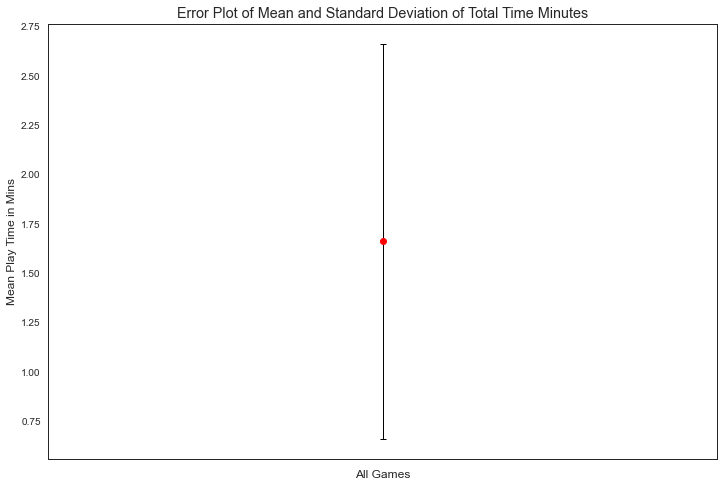

In [312]:
x = np.array([0])
y = np.array([mean])
e = np.array([std])

plt.errorbar(x, y, yerr=e, fmt='o', color='red', ecolor='black', elinewidth=1, capsize=3)
plt.xticks([0], [ ''])
plt.xlabel('All Games')
plt.ylabel('Mean Play Time in Mins')
plt.title('Error Plot of Mean and Standard Deviation of Total Time Minutes')
plt.show()





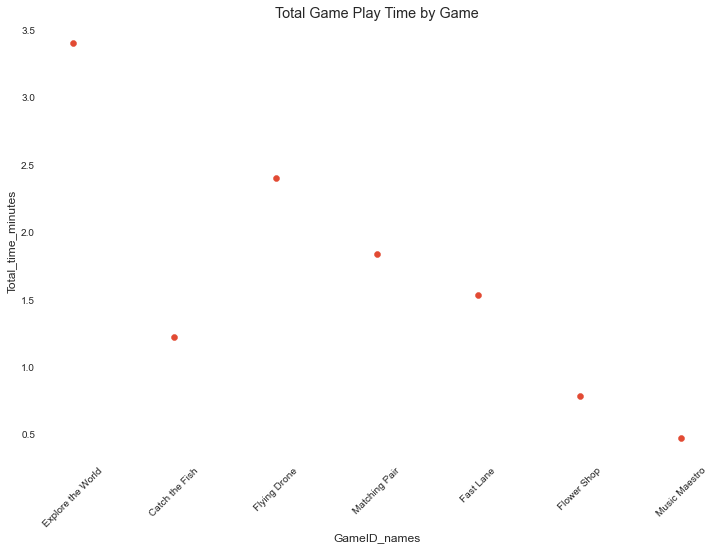

In [313]:
plt.scatter(merged['GameID_names'], merged['Total_time_minutes'])
plt.gca().set(xlabel='GameID_names', ylabel='Total_time_minutes', title='Total Game Play Time by Game')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_facecolor('white')
plt.show()

<AxesSubplot:ylabel='Total_time_minutes'>

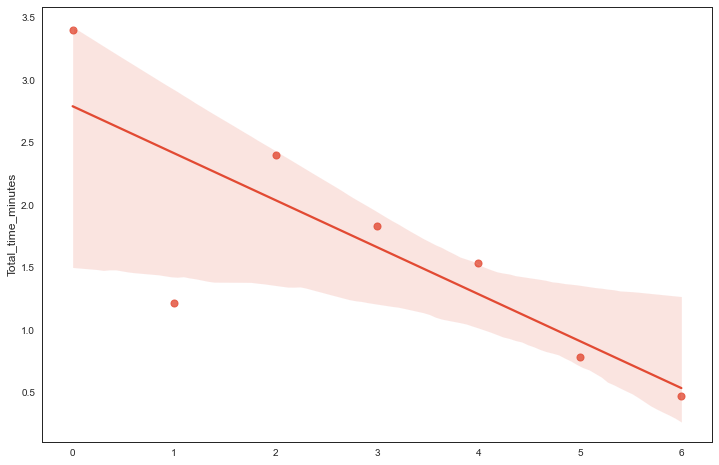

In [314]:
sns.set_style("white")
sns.regplot(x=merged.index, y='Total_time_minutes', data=merged, scatter_kws={'s': 50})


Chi-squared test

In [263]:
import scipy.stats as stats

# Create a new variable for each game name
merged['Fast Lane'] = [1 if x == 'Fast Lane' else 0 for x in merged['GameID_names']]
merged['Flower Shop'] = [1 if x == 'Flower Shop' else 0 for x in merged['GameID_names']]
merged['Explore the World'] = [1 if x == 'Explore the World' else 0 for x in merged['GameID_names']]
merged['Catch the Fish'] = [1 if x == 'Catch the Fish' else 0 for x in merged['GameID_names']]
merged['Flying Drone'] = [1 if x == 'Flying Drone' else 0 for x in merged['GameID_names']]
merged['Matching Pair'] = [1 if x == 'Matching Pair' else 0 for x in merged['GameID_names']]
merged['Cooking Master'] = [1 if x == 'Cooking Master' else 0 for x in merged['GameID_names']]
merged['Matching Pair'] = [1 if x == 'Matching Pair' else 0 for x in merged['GameID_names']]
merged['Isokinetic/Trajectory module/passive'] = [1 if x == 'Isokinetic/Trajectory module/passive' else 0 for x in merged['GameID_names']]
merged['Haptic Force Module'] = [1 if x == 'Haptic Force Module' else 0 for x in merged['GameID_names']]
merged['Music Maestro'] = [1 if x == 'Music Maestro' else 0 for x in merged['GameID_names']]
merged['Speed Challenge'] = [1 if x == 'Speed Challenge' else 0 for x in merged['GameID_names']]

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency([merged['Explore the World'], merged['Total_time_minutes']])

# Check the results
if p < 0.05:
    print("There is a significant association between game name and total time in minutes")
else:
    print("There is no significant association between game name and total time in minutes")


There is no significant association between game name and total time in minutes


Cramer's V

In [275]:
table = pd.crosstab(merged['GameID'], merged['GameID_names'])
chi2, p, dof, expected = chi2_contingency(table)
n = table.shape[0]

cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))

print("Cramer's V:", cramers_v)

Cramer's V: 1.0


#Saving the patients' information in the .csv to visualize it in Tableau

In [315]:
merged.to_csv('D:/Articares/Tableau_csv/'+string+'_games_info.csv', index=False)

In [317]:
'''

data = {'PatientID': ['Patient_1', 'Patient_2', 'Patient_3'],
        'Time(mins per day)': [8.95, 6.18, 7.6]}

df_time = pd.DataFrame(data)
print(df_time)
df_time.to_csv('D:/Articares/Tableau_csv/time_all_patients_info.csv', index=False)
'''

   PatientID  Time(mins per day)
0  Patient_1                8.95
1  Patient_2                6.18
2  Patient_3                7.60
